<a href="https://colab.research.google.com/github/xhroch01/MPA-MLF/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feedforward Neural Networks**

0. First import libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

**1. prepare data**
In this part, the task would be to prepade our dataset, basically it is the logic table for XOR function

In [ ]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# X = [[0, 0], [0, 1], [1, 0], [1, 1]]
# y = [0, 1, 1, 0]

**2. Creating the model**
To create a model of NN that is in the picture above, run the following cell

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

**3. Compile the model**
To compile yor model run:

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**4. Model training**

In [ ]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

**5. Model evaluation**

In [ ]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


**6. Model predictions**

In [ ]:
for id_x, data_sample in enumerate(X):
    prediction = model.predict(np.expand_dims(data_sample, axis=0))
    print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Data sample is [0 0], prediction from model [[[0.5240673]
  [0.5240673]]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Data sample is [0 1], prediction from model [[[0.5240673]
  [0.5318476]]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Data sample is [1 0], prediction from model [[[0.5318476]
  [0.5240673]]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Data sample is [1 1], prediction from model [[[0.5318476]
  [0.5318476]]], ground_truth 0


**7. Display loss function during the training process and acuracy**

Text(0, 0.5, 'loss')

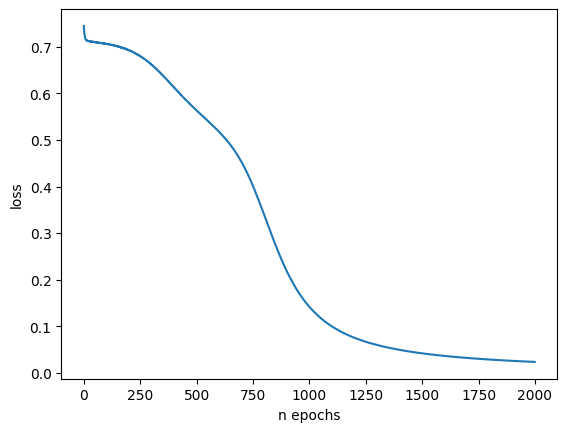

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

**Exercise 2 - Congressional Voting Data**

In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is republican or democrat based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

**1. Loading dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

path_to_dataset = 'voting_complete.csv'
pd_dataset = pd.read_csv(path_to_dataset)

Saving voting_complete.csv to voting_complete (1).csv


In [4]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


**2. Train/Test Split**
Fistlty we need to split our dataset into train and test. We will use 80% of dataset as our trainset and 20% od dataset as our testset. You can use functions included in keras, scikit-learn, or you can write your own:

In [5]:
# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [6]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

**3. Data examination**
The task would be to examine the dataset. Check:

1. Is it a classification of regression task?
2. How many data samples do we have?
3. How many features do we have?
4. What data types do we have in our dataset?
5. Are there any missing values?
6. How many labels do we have?

In [7]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
344,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
345,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
346,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


**4. Data preprocessing**

When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set.

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)

Replace missing values with any data imputation technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding
The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [8]:
x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0], inplace=True)
x_train
x=pd.get_dummies(x_train)
x

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
1,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
2,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,True,False
3,True,False,False,True,False,True,True,False,True,False,...,True,False,False,True,True,False,True,False,False,True
4,False,True,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,True,False,True,False,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
344,True,False,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
345,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
346,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True


In [9]:
y=y_train.replace(('republican', 'democrat'),(1,0))
y

<ipython-input-9-7e30a65fa6b3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y_train.replace(('republican', 'democrat'),(1,0))


,Class Name
0,1
1,1
2,0
3,0
4,0
...,...
343,1
344,0
345,1
346,1


**5. Creating the model**
1. Create your model using alteast one hidden layer.
hint: do not create too complex models, this is a very simple task, so it would be enought to use just few neurons in the hidden layers

In [10]:
model = Sequential()
model.add(Dense(2, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Check what model.summary() does

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

Compile the model, choose a suitable loss function, choose gradient to descend optimizer and specify the learning rate, and choose accuracy as our metric

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Train the model. Specify the number of epochs and batch size. Now is the time to create a validation dataset. Set 20% of dataset to be a validation dataset

In [13]:
from sklearn.model_selection import train_test_split


#Split the dataset into training and validation datasets (80% training, 20% validation)

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)


# Train the model with specified epochs and batch size, including validation data
history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=4,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.4032 - val_accuracy: 0.9429 - val_loss: 0.1474
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 0.2071 - val_accuracy: 0.9714 - val_loss: 0.1687
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.0921 - val_accuracy: 0.9714 - val_loss: 0.1277
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9419 - loss: 0.1193 - val_accuracy: 0.9714 - val_loss: 0.0870
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1482 - val_accuracy: 0.9714 - val_loss: 0.1094
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9437 - loss: 0.1162 - val_accuracy: 0.9429 - val_loss: 0.2514
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1238 - val_accuracy: 0.9571 - val_loss: 0.2187
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0992 - val_accuracy: 0.9714 - val_loss:

**7. Model Evaluation**

First, apply the same preprocessing you did to train set to test set also

In [14]:
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_test.mode().iloc[0], inplace=True)

x_te=pd.get_dummies(x_test)
x_te
y_te= y_test.replace(('republican', 'democrat'),(1,0))
y_te

<ipython-input-14-6d6fe626aaa4>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_te= y_test.replace(('republican', 'democrat'),(1,0))


,Class Name
0,1
1,1
2,0
3,0
4,0
...,...
82,1
83,1
84,0
85,1


Evaluate the model, print final accuracy and loss

In [21]:
loss, accuracy = model.evaluate(x, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 97.41


Plot loss and validation loss depending on the training epochs into one graph. In another graph, plot accuracy and validation accuracy

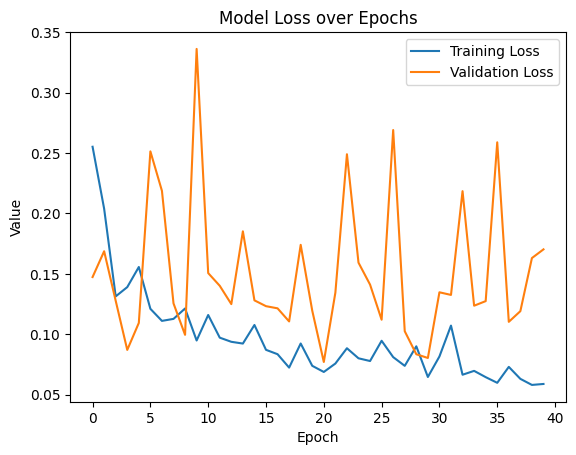

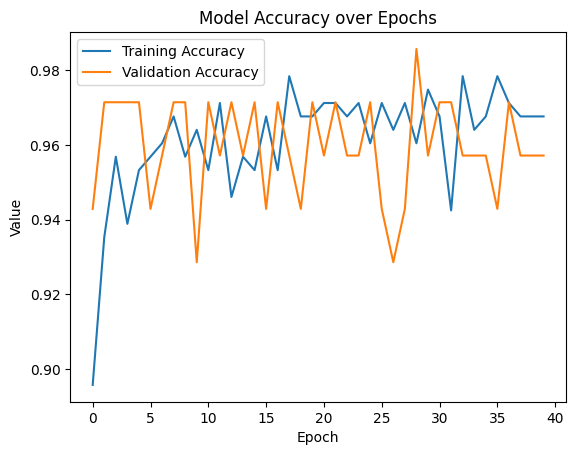

In [24]:
import matplotlib.pyplot as plt

# Plot the loss history
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_ylabel('Value')
ax.set_xlabel('Epoch')
ax.set_title('Model Loss over Epochs')
ax.legend()
plt.show()

# Plot the accuracy history
fig, ay = plt.subplots()
ay.plot(history.history['accuracy'], label='Training Accuracy')
ay.plot(history.history['val_accuracy'], label='Validation Accuracy')
ay.set_ylabel('Value')
ay.set_xlabel('Epoch')
ay.set_title('Model Accuracy over Epochs')
ay.legend()
plt.show()